In [9]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [10]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [11]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [12]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [13]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [14]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station
session=Session(engine)

In [16]:
# Create our session (link) from Python to the DB
inspector = inspect(engine)

In [17]:
#Station table keys
stations=engine.execute('SELECT * FROM Station')
print(stations.keys())

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']


In [18]:
#Measurement table keys
measurements=engine.execute('SELECT * FROM Measurement')
print(measurements.keys())

['id', 'station', 'date', 'prcp', 'tobs']


# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
recent_date=(session.query(Measurement.date).order_by(Measurement.date.desc()).first())
recent_date

('2017-08-23')

Most recent date in data:  ('2017-08-23',)
1 year from most recent date: 2016-08-22


<AxesSubplot:title={'center':'Hawaii Precipitation 2016-2017'}, xlabel='date', ylabel='Precipitation (inches)'>

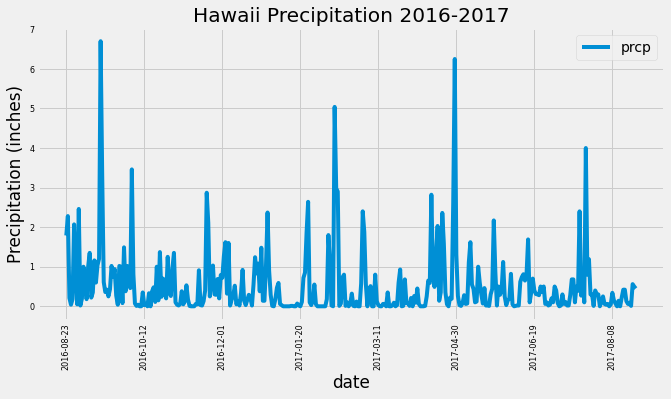

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
print('Most recent date in data: ', recent_date)

# Calculate the date one year from the last date in data set.
year_ago_date=dt.date(2017, 8, 23) - dt.timedelta(days=366)
print('1 year from most recent date:', year_ago_date)

# Perform a query to retrieve the data and precipitation scores
year_prcp_scores=(session.query(Measurement.date,func.max(Measurement.prcp))
                  .filter(func.strftime('%Y-%m-%d',Measurement.date) > year_ago_date)
                  .group_by(Measurement.date)
                  .all())
#year_prcp_scores

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df=pd.DataFrame(year_prcp_scores, columns=['date', 'prcp'])
prcp_df.set_index('date',inplace=True)
prcp_df.head(10)

# Sort the dataframe by date
prcp_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(rot=90,fontsize=8,figsize = (10,5),\
                    title="Hawaii Precipitation 2016-2017",\
                   ylabel = "Precipitation (inches)")



In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,366.000000
mean,0.520765
std,0.830728
min,0.000000
25%,0.040000
50%,0.250000
75%,0.672500
max,6.700000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number stations in the dataset
total_stations=session.query(Station).count()
print(f'There are {total_stations} stations in Hawaii.')

There are 9 stations in Hawaii.


In [27]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity=(session.query(Measurement.station,func.count(Measurement.station))
                         .group_by(Measurement.station)
                         .order_by(func.count(Measurement.station).desc())
                         .all())
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()